In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pickle

In [2]:
## Load the dataset
data=pd.read_csv("customerData_500k.csv")
data.head()

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,CustomerTenureYears,LastPurchaseDaysAgo,Gender,ProductCategory,PreferredDevice,Region,ReferralSource,CustomerSegment,LoyaltyProgram,DiscountsAvailed,SessionCount,CustomerSatisfaction,PurchaseStatus
0,37,57722.572411,19,5.908826,1.093430,11,Male,Furniture,Desktop,South,Paid Ads,Regular,1,5,3,2,1
1,63,21328.925876,10,6.970749,0.649246,20,Female,Furniture,Mobile,East,Organic,VIP,0,4,2,3,0
2,60,150537.742465,19,35.004954,3.858211,25,Male,Electronics,Desktop,South,Organic,VIP,1,2,5,2,0
3,19,63508.762549,10,14.818000,7.554374,20,Male,Furniture,Desktop,West,Paid Ads,Premium,0,0,1,3,0
4,54,100399.558368,19,55.925462,0.197411,92,Male,Electronics,Mobile,South,Referral,Regular,1,4,1,2,0


In [3]:
print(data.duplicated().any())

False


In [4]:
## Encode categorical variables
label_encoder_gender=LabelEncoder()
data['Gender']=label_encoder_gender.fit_transform(data['Gender'])
data

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,CustomerTenureYears,LastPurchaseDaysAgo,Gender,ProductCategory,PreferredDevice,Region,ReferralSource,CustomerSegment,LoyaltyProgram,DiscountsAvailed,SessionCount,CustomerSatisfaction,PurchaseStatus
0,37,57722.572411,19,5.908826,1.093430,11,1,Furniture,Desktop,South,Paid Ads,Regular,1,5,3,2,1
1,63,21328.925876,10,6.970749,0.649246,20,0,Furniture,Mobile,East,Organic,VIP,0,4,2,3,0
2,60,150537.742465,19,35.004954,3.858211,25,1,Electronics,Desktop,South,Organic,VIP,1,2,5,2,0
3,19,63508.762549,10,14.818000,7.554374,20,1,Furniture,Desktop,West,Paid Ads,Premium,0,0,1,3,0
4,54,100399.558368,19,55.925462,0.197411,92,1,Electronics,Mobile,South,Referral,Regular,1,4,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,56,113252.441232,16,26.327274,6.003410,135,1,Kitchen,Mobile,South,Referral,Premium,1,0,1,2,0
499996,40,59758.016150,13,7.124139,-0.006796,123,1,Kitchen,Desktop,North,Organic,Premium,1,1,3,3,0
499997,50,64968.696662,10,28.440505,0.649710,20,1,Fashion,Mobile,North,Referral,VIP,0,4,2,2,0
499998,38,150832.320683,8,50.161579,2.903859,8,0,Kitchen,Mobile,South,Organic,Premium,0,6,1,3,1


In [5]:
## Onehot encode all categorical data
from sklearn.preprocessing import OneHotEncoder
onehot_encoder_product=OneHotEncoder()
onehot_encoder_device=OneHotEncoder()
onehot_encoder_region=OneHotEncoder()
onehot_encoder_source=OneHotEncoder()
onehot_encoder_segment=OneHotEncoder()

product_encoder=onehot_encoder_product.fit_transform(data[['ProductCategory']]).toarray()
device_encoder=onehot_encoder_device.fit_transform(data[['PreferredDevice']]).toarray()
region_encoder=onehot_encoder_region.fit_transform(data[['Region']]).toarray()
source_encoder=onehot_encoder_source.fit_transform(data[['ReferralSource']]).toarray()
segment_encoder=onehot_encoder_segment.fit_transform(data[['CustomerSegment']]).toarray()

In [6]:
product_encoder

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]])

In [7]:
onehot_encoder_product.get_feature_names_out(['ProductCategory'])

array(['ProductCategory_Electronics', 'ProductCategory_Fashion',
       'ProductCategory_Furniture', 'ProductCategory_Groceries',
       'ProductCategory_Kitchen'], dtype=object)

In [8]:
product_encoded_df=pd.DataFrame(product_encoder,columns=onehot_encoder_product.get_feature_names_out(['ProductCategory']))
product_encoded_df

,ProductCategory_Electronics,ProductCategory_Fashion,ProductCategory_Furniture,ProductCategory_Groceries,ProductCategory_Kitchen
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
499995,0.0,0.0,0.0,0.0,1.0
499996,0.0,0.0,0.0,0.0,1.0
499997,0.0,1.0,0.0,0.0,0.0
499998,0.0,0.0,0.0,0.0,1.0


In [9]:
device_encoded_df=pd.DataFrame(device_encoder,columns=onehot_encoder_device.get_feature_names_out(['PreferredDevice']))
region_encoded_df=pd.DataFrame(region_encoder,columns=onehot_encoder_region.get_feature_names_out(['Region']))
source_encoded_df=pd.DataFrame(source_encoder,columns=onehot_encoder_source.get_feature_names_out(['ReferralSource']))
segment_encoded_df=pd.DataFrame(segment_encoder,columns=onehot_encoder_segment.get_feature_names_out(['CustomerSegment']))


In [10]:
## Combine one hot encoder columns with the original data
data=pd.concat([data.drop(['ProductCategory','PreferredDevice','Region','ReferralSource','CustomerSegment'],axis=1),product_encoded_df,device_encoded_df,region_encoded_df,source_encoded_df,segment_encoded_df],axis=1)
data.head()

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,CustomerTenureYears,LastPurchaseDaysAgo,Gender,LoyaltyProgram,DiscountsAvailed,SessionCount,...,Region_South,Region_West,ReferralSource_Email,ReferralSource_Organic,ReferralSource_Paid Ads,ReferralSource_Referral,ReferralSource_Social,CustomerSegment_Premium,CustomerSegment_Regular,CustomerSegment_VIP
0,37,57722.572411,19,5.908826,1.093430,11,1,1,5,3,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,63,21328.925876,10,6.970749,0.649246,20,0,0,4,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,60,150537.742465,19,35.004954,3.858211,25,1,1,2,5,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,19,63508.762549,10,14.818000,7.554374,20,1,0,0,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,54,100399.558368,19,55.925462,0.197411,92,1,1,4,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [11]:
## DiVide the dataset into indepent and dependent features
X=data.drop('PurchaseStatus',axis=1)
y=data['PurchaseStatus']

## Split the data in training and tetsing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Scale these features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [12]:
X_train

array([[ 0.13050199, -1.01728798,  0.26895911, ...,  1.05046165,
        -0.54142246, -0.6513937 ],
       [-0.31364671, -0.39902895, -1.56309383, ...,  1.05046165,
        -0.54142246, -0.6513937 ],
       [ 0.32085143, -0.64545864,  0.43550938, ..., -0.95196241,
         1.84698653, -0.6513937 ],
       ...,
       [ 0.76500013,  0.4097877 ,  0.76860992, ..., -0.95196241,
        -0.54142246,  1.53516991],
       [ 0.51120087,  0.36069156,  1.10171045, ...,  1.05046165,
        -0.54142246, -0.6513937 ],
       [ 1.39949827,  0.49880753,  0.76860992, ..., -0.95196241,
        -0.54142246,  1.53516991]])

In [13]:
data

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,CustomerTenureYears,LastPurchaseDaysAgo,Gender,LoyaltyProgram,DiscountsAvailed,SessionCount,...,Region_South,Region_West,ReferralSource_Email,ReferralSource_Organic,ReferralSource_Paid Ads,ReferralSource_Referral,ReferralSource_Social,CustomerSegment_Premium,CustomerSegment_Regular,CustomerSegment_VIP
0,37,57722.572411,19,5.908826,1.093430,11,1,1,5,3,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,63,21328.925876,10,6.970749,0.649246,20,0,0,4,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,60,150537.742465,19,35.004954,3.858211,25,1,1,2,5,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,19,63508.762549,10,14.818000,7.554374,20,1,0,0,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,54,100399.558368,19,55.925462,0.197411,92,1,1,4,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,56,113252.441232,16,26.327274,6.003410,135,1,1,0,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
499996,40,59758.016150,13,7.124139,-0.006796,123,1,1,1,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
499997,50,64968.696662,10,28.440505,0.649710,20,1,0,4,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
499998,38,150832.320683,8,50.161579,2.903859,8,0,0,6,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [15]:
(X_train.shape[1],)

(31,)

In [16]:
## Build Our ANN Model
model=Sequential([
    Dense(128,activation='relu',input_shape=(X_train.shape[1],)), ## HL1 Connected wwith input layer
    Dense(64,activation='relu'), ## HL2
    Dense(32,activation='relu'), ## HL3
    Dense(1,activation='sigmoid')  ## output layer
]

)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,465 (56.50 KB)

 Trainable params: 14,465 (56.50 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
loss=tensorflow.keras.losses.BinaryCrossentropy()
loss

<LossFunctionWrapper(<function binary_crossentropy at 0x79da827c56c0>, kwargs={'from_logits': False, 'label_smoothing': 0.0, 'axis': -1})>

In [19]:
from tensorflow import keras

## compile the model
model.compile(optimizer=opt,loss="binary_crossentropy",
              metrics=['accuracy',keras.metrics.AUC(name="auc"),
            keras.metrics.Precision(name="precision"),
            keras.metrics.Recall(name="recall"),])

In [20]:
## Set up the Tensorboard
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

In [21]:
## Set up Early Stopping
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)


In [22]:
### Train the model
history=model.fit(
    X_train,y_train,validation_data=(X_test,y_test),epochs=100,
    callbacks=[tensorflow_callback,early_stopping_callback]
)

Epoch 1/100
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 52s 4ms/step - accuracy: 0.9121 - auc: 0.9728 - loss: 0.1996 - precision: 0.8748 - recall: 0.9210 - val_accuracy: 0.9201 - val_auc: 0.9793 - val_loss: 0.1875 - val_precision: 0.8689 - val_recall: 0.9521
Epoch 2/100
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 54s 4ms/step - accuracy: 0.9218 - auc: 0.9786 - loss: 0.1806 - precision: 0.8917 - recall: 0.9258 - val_accuracy: 0.9232 - val_auc: 0.9798 - val_loss: 0.1800 - val_precision: 0.9031 - val_recall: 0.9142
Epoch 3/100
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 48s 4ms/step - accuracy: 0.9223 - auc: 0.9789 - loss: 0.1813 - precision: 0.8931 - recall: 0.9244 - val_accuracy: 0.9222 - val_auc: 0.9804 - val_loss: 0.1806 - val_precision: 0.8731 - val_recall: 0.9520
Epoch 4/100
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 53s 4ms/step - accuracy: 0.9230 - auc: 0.9795 - loss: 0.1773 - precision: 0.8948 - recall: 0.9245 - val_accuracy: 0.9255 - val_auc: 0.9805 - val_loss: 0.1788 - val_precision: 0.8928 - val_recall: 0.9336
Epoch 5/

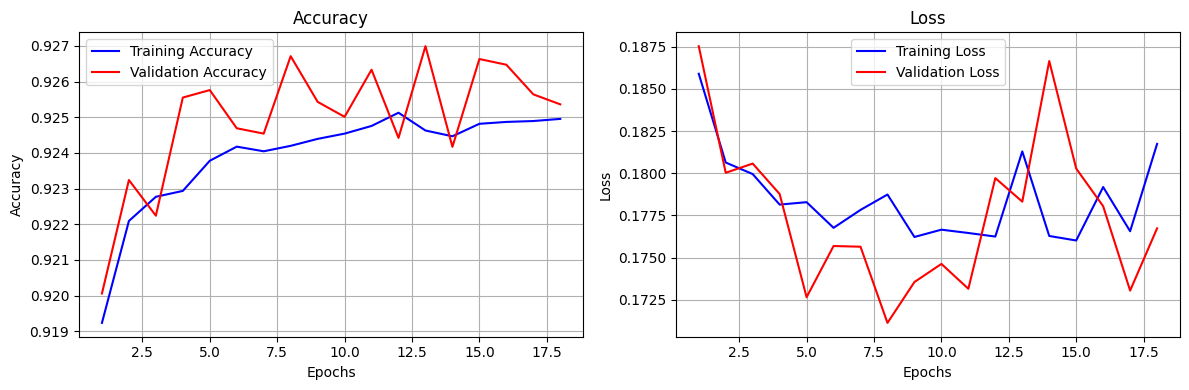

In [23]:
import matplotlib.pyplot as plt

# Extract metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Create subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # width=12, height=4 → smaller size

# Plot Accuracy
ax1.plot(epochs, acc, 'b-', label='Training Accuracy')
ax1.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Plot Loss
ax2.plot(epochs, loss, 'b-', label='Training Loss')
ax2.plot(epochs, val_loss, 'r-', label='Validation Loss')
ax2.set_title('Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


In [24]:
model.save('purchasePredictionModel_collab.h5')

In [25]:
# Example input matching your dataset schema
input_data = {
    "Age": 35,
    "AnnualIncome": 75000,
    "NumberOfPurchases": 12,
      "TimeSpentOnWebsite": 42.5,
          "CustomerTenureYears": 2.4,
              "LastPurchaseDaysAgo": 15,
                  "Gender": "Male",
                      "ProductCategory": "Electronics",
                        "PreferredDevice": "Mobile",
    "Region": "South",
    "ReferralSource": "Organic",
        "CustomerSegment": "Premium",

                      "LoyaltyProgram": 1,
                          "DiscountsAvailed": 3,
                              "SessionCount": 5,
                                  "CustomerSatisfaction": 4

}


In [26]:
# One-hot encode 'ProductCategory'
product_encoded = onehot_encoder_product.transform([[input_data['ProductCategory']]]).toarray()
device_encoded = onehot_encoder_device.transform([[input_data['PreferredDevice']]]).toarray()
region_encoded = onehot_encoder_region.transform([[input_data['Region']]]).toarray()
source_encoded = onehot_encoder_source.transform([[input_data['ReferralSource']]]).toarray()
segment_encoded = onehot_encoder_segment.transform([[input_data['CustomerSegment']]]).toarray()


product_encoded_df = pd.DataFrame(product_encoded, columns=onehot_encoder_product.get_feature_names_out(['ProductCategory']))
device_encoded_df = pd.DataFrame(device_encoded, columns=onehot_encoder_device.get_feature_names_out(['PreferredDevice']))
region_encoded_df = pd.DataFrame(region_encoded, columns=onehot_encoder_region.get_feature_names_out(['Region']))
source_encoded_df = pd.DataFrame(source_encoded, columns=onehot_encoder_source.get_feature_names_out(['ReferralSource']))
segment_encoded_df = pd.DataFrame(segment_encoded, columns=onehot_encoder_segment.get_feature_names_out(['CustomerSegment']))

product_encoded_df


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


,ProductCategory_Electronics,ProductCategory_Fashion,ProductCategory_Furniture,ProductCategory_Groceries,ProductCategory_Kitchen
0,1.0,0.0,0.0,0.0,0.0


In [27]:
device_encoded_df

,PreferredDevice_Desktop,PreferredDevice_Mobile,PreferredDevice_Tablet
0,0.0,1.0,0.0


In [28]:
input_df=pd.DataFrame([input_data])
input_df

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,CustomerTenureYears,LastPurchaseDaysAgo,Gender,ProductCategory,PreferredDevice,Region,ReferralSource,CustomerSegment,LoyaltyProgram,DiscountsAvailed,SessionCount,CustomerSatisfaction
0,35,75000,12,42.5,2.4,15,Male,Electronics,Mobile,South,Organic,Premium,1,3,5,4


In [29]:
## Encode categorical variables
input_df['Gender']=label_encoder_gender.transform(input_df['Gender'])
input_df

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,CustomerTenureYears,LastPurchaseDaysAgo,Gender,ProductCategory,PreferredDevice,Region,ReferralSource,CustomerSegment,LoyaltyProgram,DiscountsAvailed,SessionCount,CustomerSatisfaction
0,35,75000,12,42.5,2.4,15,1,Electronics,Mobile,South,Organic,Premium,1,3,5,4


In [30]:
## concatination one hot encoded
input_df=pd.concat([input_df.drop(['ProductCategory','PreferredDevice','Region','ReferralSource','CustomerSegment'],axis=1),product_encoded_df,device_encoded_df,region_encoded_df,source_encoded_df,segment_encoded_df],axis=1)
input_df

,Age,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,CustomerTenureYears,LastPurchaseDaysAgo,Gender,LoyaltyProgram,DiscountsAvailed,SessionCount,...,Region_South,Region_West,ReferralSource_Email,ReferralSource_Organic,ReferralSource_Paid Ads,ReferralSource_Referral,ReferralSource_Social,CustomerSegment_Premium,CustomerSegment_Regular,CustomerSegment_VIP
0,35,75000,12,42.5,2.4,15,1,1,3,5,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
## Scaling the input data

# scaler=StandardScaler()
input_scaled=scaler.transform(input_df)
input_scaled

array([[-0.56744596, -0.25326368,  0.10240885,  0.67615374,  0.10627636,
        -0.82326874,  0.99030202,  0.99760287, -0.08231865,  1.78288412,
         0.94455361,  2.0526628 , -0.53472006, -0.48426703, -0.46877521,
        -0.52444507, -0.67386254,  0.91495232, -0.40913616, -0.49423144,
        -0.57280453,  1.34497186, -0.50099199, -0.41831983,  1.18365216,
        -0.53680317, -0.29489894, -0.38805385,  1.05046165, -0.54142246,
        -0.6513937 ]])

In [32]:
## Predict churn
prediction=model.predict(input_scaled)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


array([[0.99376726]], dtype=float32)

In [33]:
prediction_proba = prediction[0][0]

prediction_proba

np.float32(0.99376726)

In [34]:
if prediction_proba > 0.5:
    print('The customer is likely to make a purchase.')
else:
    print('The customer is not likely to make a purchase.')

The customer is likely to make a purchase.
